In [1]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError,MeanSquaredError
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
pip install visualkeras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import visualkeras

In [4]:
ewt_signal_length = 126
n_levels = 10
memory_units = int(32)
batchsize = 128

In [5]:
def custom_layer1(tensor):
  return tensor[:,0,:]
def custom_layer2(tensor):
  return tensor[:,1,:]
def custom_layer3(tensor):
  return tensor[:,2,:]
def custom_layer4(tensor):
  return tensor[:,3,:]
def custom_layer5(tensor):
  return tensor[:,4,:]
def custom_layer6(tensor):
  return tensor[:,5,:]
def custom_layer7(tensor):
  return tensor[:,6,:]
def custom_layer8(tensor):
  return tensor[:,7,:]
def custom_layer9(tensor):
  return tensor[:,8,:]
def custom_layer10(tensor):
  return tensor[:,9,:]

In [6]:
ewt_signal_length = 126
n_levels = 10
memory_units1 = int(16)
memory_units2 = int(16)
# batchsize = 256
batchsize = 256
def custom_layer1(tensor):
  return tensor[:,0,:]
def custom_layer2(tensor):
  return tensor[:,1,:]
def custom_layer3(tensor):
  return tensor[:,2,:]
def custom_layer4(tensor):
  return tensor[:,3,:]
def custom_layer5(tensor):
  return tensor[:,4,:]
def custom_layer6(tensor):
  return tensor[:,5,:]
def custom_layer7(tensor):
  return tensor[:,6,:]
def custom_layer8(tensor):
  return tensor[:,7,:]
def custom_layer9(tensor):
  return tensor[:,8,:]
def custom_layer10(tensor):
  return tensor[:,9,:]

input = keras.Input(shape = (n_levels,ewt_signal_length))
input_data_model_1 = tensorflow.keras.layers.Lambda(custom_layer1, name="lambda_layer1")(input)
input_data_model_1 = layers.Reshape((1,ewt_signal_length))(input_data_model_1)
input_data_model_2 = tensorflow.keras.layers.Lambda(custom_layer2, name="lambda_layer2")(input)
input_data_model_2 = layers.Reshape((1,ewt_signal_length))(input_data_model_2)
input_data_model_3 = tensorflow.keras.layers.Lambda(custom_layer3, name="lambda_layer3")(input)
input_data_model_3 = layers.Reshape((1,ewt_signal_length))(input_data_model_3)
input_data_model_4 = tensorflow.keras.layers.Lambda(custom_layer4, name="lambda_layer4")(input)
input_data_model_4 = layers.Reshape((1,ewt_signal_length))(input_data_model_4)
input_data_model_5 = tensorflow.keras.layers.Lambda(custom_layer5, name="lambda_layer5")(input)
input_data_model_5 = layers.Reshape((1,ewt_signal_length))(input_data_model_5)
input_data_model_6 = tensorflow.keras.layers.Lambda(custom_layer6, name="lambda_layer6")(input)
input_data_model_6 = layers.Reshape((1,ewt_signal_length))(input_data_model_6)
input_data_model_7 = tensorflow.keras.layers.Lambda(custom_layer7, name="lambda_layer7")(input)
input_data_model_7 = layers.Reshape((1,ewt_signal_length))(input_data_model_7)
input_data_model_8 = tensorflow.keras.layers.Lambda(custom_layer8, name="lambda_layer8")(input)
input_data_model_8 = layers.Reshape((1,ewt_signal_length))(input_data_model_8)
input_data_model_9 = tensorflow.keras.layers.Lambda(custom_layer9, name="lambda_layer9")(input)
input_data_model_9 = layers.Reshape((1,ewt_signal_length))(input_data_model_9)
input_data_model_10 = tensorflow.keras.layers.Lambda(custom_layer10, name="lambda_layer10")(input)
input_data_model_10 = layers.Reshape((1,ewt_signal_length))(input_data_model_10)
for i in range(n_levels):
  globals()[f"input_data_model_{i+1}"] = layers.BatchNormalization(scale = False,center = False)(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"]= layers.LSTM(memory_units1,return_sequences = True)(globals()[f"input_data_model_{i+1}"])
  globals()[f"x{i+1}"] = layers.LSTM(int(memory_units1/2))(globals()[f"x{i+1}"])
  globals()[f"x{i+1}"] = layers.Dropout(0.5)(globals()[f"x{i+1}"])
  globals()[f"output_{i+1}"] = layers.Dense(1,activation = 'linear')(globals()[f"x{i+1}"])

outputs_models = layers.concatenate([output_1, output_2,output_3,output_4,output_5,output_6,output_7,output_8,output_9,output_10])
outputs_models = layers.BatchNormalization(scale = False,center = False)(outputs_models)
# final_output = layers.Dense(1)(outputs_models)
z = layers.Reshape((1,n_levels))(outputs_models)
z = layers.LSTM(memory_units2,return_sequences = True)(z)
z = layers.LSTM(int(memory_units2/2))(z)
final_output = layers.Dense(1,activation = 'linear')(z)
#z = layers.RNN(layers.LSTMCell(32),return_sequences = True)(outputs_models)
# z = layers.RNN(layers.LSTMCell(16))(z)
# final_output = layers.Dense(1)(z)
model = keras.Model(inputs = input,outputs = final_output,name = 'my_model')

In [7]:
model.summary()

Model: "my_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 126)]    0           []                               
                                                                                                  
 lambda_layer1 (Lambda)         (None, 126)          0           ['input_1[0][0]']                
                                                                                                  
 lambda_layer2 (Lambda)         (None, 126)          0           ['input_1[0][0]']                
                                                                                                  
 lambda_layer3 (Lambda)         (None, 126)          0           ['input_1[0][0]']                
                                                                                           

In [17]:
model.save('midsemreport.h5')

In [16]:
cd MyDrive

/content/drive/MyDrive


In [26]:
model.summary()

Model: "my_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 10, 126)]    0           []                               
                                                                                                  
 lambda_layer1 (Lambda)         (None, 126)          0           ['input_7[0][0]']                
                                                                                                  
 lambda_layer2 (Lambda)         (None, 126)          0           ['input_7[0][0]']                
                                                                                                  
 lambda_layer3 (Lambda)         (None, 126)          0           ['input_7[0][0]']                
                                                                                           

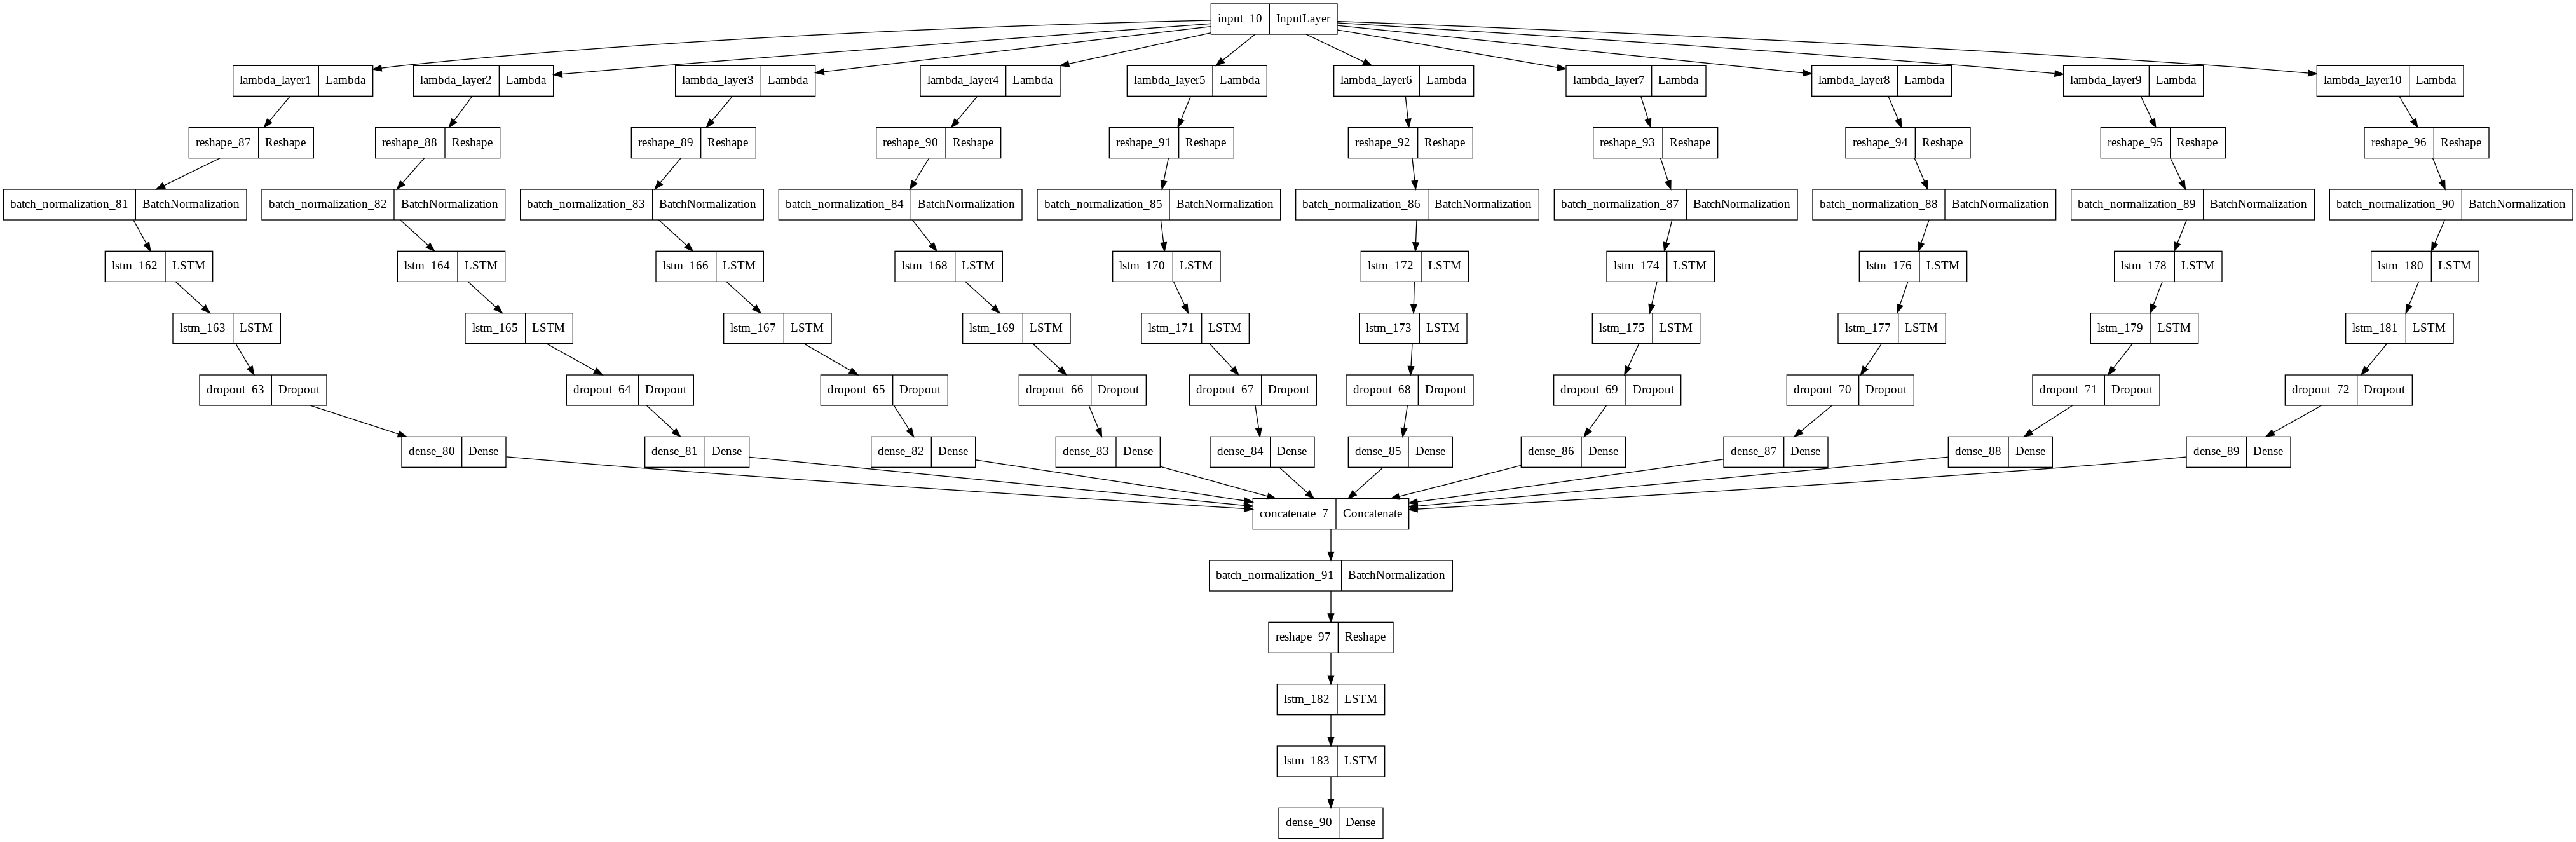

In [36]:
plot_model(model)

In [11]:
optimizer = keras.optimizers.Adam()

model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['RootMeanSquaredError','MeanSquaredError','accuracy']) # Try SGD, adam, adagrad and compare!!!


In [33]:
!pip3 install keras-visualizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from keras_visualizer import visualizer 
visualizer(model, format='png', view=True)


ValueError: ignored

In [ ]:
x = np.load('x_n1_my.npy')
y = np.load('y_n1_my.npy')
X = x.transpose()
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size = 0.95)
optimizer = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['RootMeanSquaredError','MeanSquaredError','accuracy']) # Try SGD, adam, adagrad and compare!!!
file = 'model_best.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]
history = model.fit(x_train,y_train, epochs=700, batch_size=batchsize, verbose=2,validation_split = 0.2, callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 0.47481, saving model to /home/nitya/projects/LoudnessCurve(vineet)/best_model_full_dataset.hdf5
778/778 - 77s - loss: 0.4859 - root_mean_squared_error: 0.6971 - mean_squared_error: 0.4859 - accuracy: 0.0000e+00 - val_loss: 0.4748 - val_root_mean_squared_error: 0.6891 - val_mean_squared_error: 0.4748 - val_accuracy: 0.0000e+00 - 77s/epoch - 99ms/step
Epoch 2/700

Epoch 2: val_loss improved from 0.47481 to 0.47206, saving model to /home/nitya/projects/LoudnessCurve(vineet)/best_model_full_dataset.hdf5
778/778 - 21s - loss: 0.4721 - root_mean_squared_error: 0.6871 - mean_squared_error: 0.4721 - accuracy: 0.0000e+00 - val_loss: 0.4721 - val_root_mean_squared_error: 0.6871 - val_mean_squared_error: 0.4721 - val_accuracy: 0.0000e+00 - 21s/epoch - 27ms/step
Epoch 3/700

Epoch 3: val_loss did not improve from 0.47206
778/778 - 21s - loss: 0.4704 - root_mean_squared_error: 0.6859 - mean_squared_error: 0.4704 - accuracy: 0.0000e+00 - val_loss:

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()